In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/OkelloAndrewPeters/datascience/main/LifeExpectancyData.csv')

In [31]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
#dropping categorical features with categorical data
df.drop(columns = ['Country', 'Status'], inplace = True, axis = 1)

<Axes: >

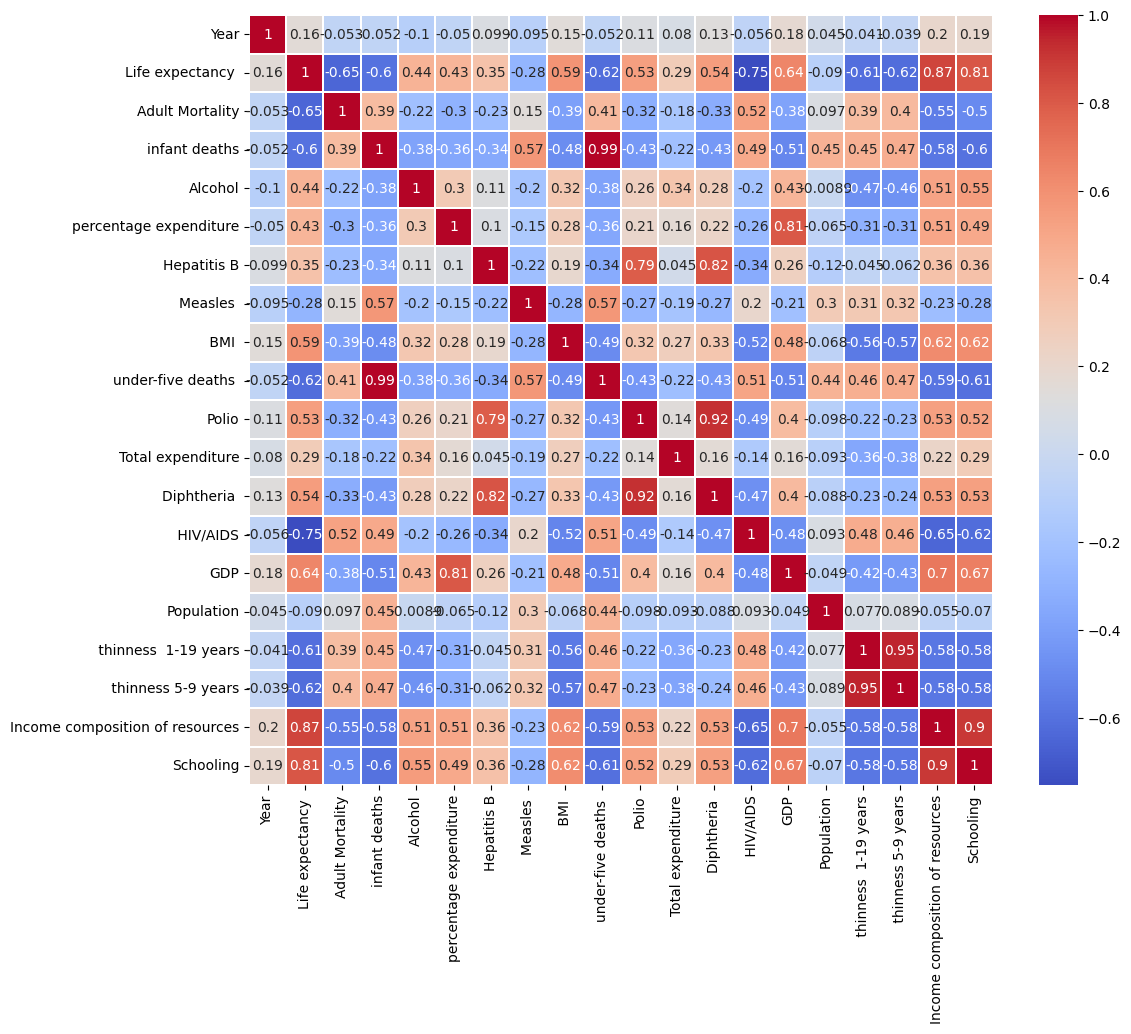

In [33]:
#using heatmap to drop features with a corr less than 0.5 wrt the life expectancy feature
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr(method = "spearman")
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap = "coolwarm", linewidth = 0.1, annot = True)

In [34]:
#dropping features with a corr less than 0.5 wrt life expectancy
df.drop(columns = ['Year', 'Alcohol', 'percentage expenditure',
                            'Hepatitis B', 'Measles ', 'Total expenditure', 'Population'], inplace = True, axis = 1)

In [35]:
df.shape

(2938, 13)

In [36]:
print(df.isnull().sum())

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
 BMI                                34
under-five deaths                    0
Polio                               19
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [37]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2904.000000,2938.000000,2919.000000,2919.000000,2938.000000,2490.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,38.321247,42.035739,82.550188,82.324084,1.742103,7483.158469,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,20.044034,160.445548,23.428046,23.716912,5.077785,14270.169342,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,19.300000,0.000000,78.000000,78.000000,0.100000,463.935626,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,43.500000,4.000000,93.000000,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,56.200000,28.000000,97.000000,97.000000,0.800000,5910.806335,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


In [38]:
#I am filling null values with either the mean or median based the difference between the 2
df.columns = df.columns.str.strip()
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["Polio"] = df["Polio"].fillna(df["Polio"].mean())
df["Diphtheria"] = df["Diphtheria"].fillna(df["Diphtheria"].mean())
df["GDP"] = df["GDP"].fillna(df["GDP"].median())
df["thinness  1-19 years"] = df["thinness  1-19 years"].fillna(df["thinness  1-19 years"].mean())
df["thinness 5-9 years"] = df["thinness 5-9 years"].fillna(df["thinness 5-9 years"].mean())
df["Income composition of resources"] = df["Income composition of resources"].fillna(df["Income composition of resources"].mean())
df["Schooling"] = df["Schooling"].fillna(df["Schooling"].mean())
df["Life expectancy"] = df["Life expectancy"].fillna(df["Life expectancy"].mean())
df["Adult Mortality"] = df["Adult Mortality"].fillna(df["Adult Mortality"].mean())

In [39]:
print(df.isnull().sum())

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
BMI                                0
under-five deaths                  0
Polio                              0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [40]:
#checking for duplicates
print(df.duplicated().sum)

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool>


In [41]:
x = (df.drop(columns=['Life expectancy'], axis = 1))
y = df['Life expectancy']

In [42]:
df.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [26]:
#spliting the data
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
c = lr.intercept_
c

54.57815210025475

In [48]:
m = lr.coef_
m

array([-2.02440374e-02,  9.94616051e-02,  4.84932348e-02, -7.46908661e-02,
        3.30064729e-02,  3.42593182e-02, -4.31960917e-01,  6.14458260e-05,
       -1.43477014e-01,  1.53136316e-02,  6.30222394e+00,  6.41871665e-01])

In [50]:
#predicting
y_pred_train = lr.predict(X_train)
y_pred_train

array([60.1633197 , 68.49998926, 77.70364036, ..., 62.78791283,
       67.04448176, 69.96227929])

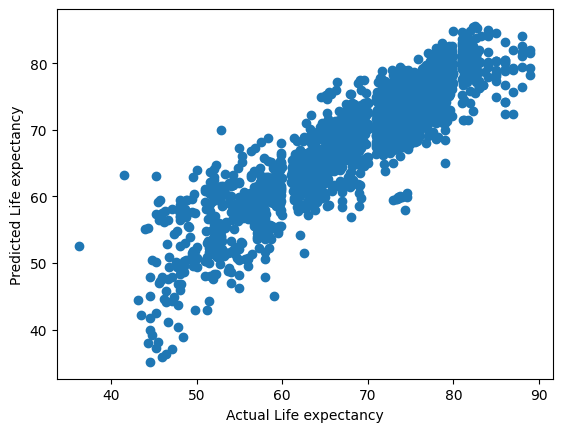

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.show()

In [53]:
#let us find how accurate we are
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.811535772078291

In [54]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([78.19400399, 65.46108792, 53.68726857, 66.97628236, 59.78196843,
       61.89994165, 72.15445364, 78.68325697, 71.02482623, 47.77407617,
       67.70277919, 80.82315036, 72.86633422, 74.34077551, 60.24425891,
       72.63760982, 59.14002441, 67.39427216, 70.81746071, 81.55071005,
       68.99955609, 75.04093904, 73.82008653, 79.77289245, 67.65020822,
       60.70225648, 80.95831795, 72.90782426, 70.96454073, 74.784062  ,
       76.63899467, 53.81233388, 73.33577244, 76.96837449, 76.32787976,
       71.32282376, 75.41350853, 83.11098324, 62.90002054, 70.75843919,
       64.52485592, 73.55211426, 76.07306444, 73.99437109, 72.31253217,
       77.85133277, 57.40381007, 72.26400684, 54.61627947, 72.88270254,
       74.97778697, 63.31879289, 76.94775676, 69.87631028, 67.91390276,
       72.12464893, 79.85821673, 71.15712752, 60.57662351, 71.5211968 ,
       70.21095415, 71.86569177, 72.2715435 , 68.28730103, 58.05611559,
       73.78602811, 70.69662496, 74.8664587 , 63.4802764 , 76.25

In [55]:
r2_score(y_test, y_pred_test)

0.8158861268934514